# 1. Library Setting

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import PartialDependenceDisplay

# 2. Urban vitality index data

In [52]:
uvi = pd.read_excel('Urban_vitality_index.xlsx', header = None)
uvi

,0
0,7
1,6
2,7
3,8
4,8
...,...
303,5
304,4
305,5
306,5


In [84]:
test_prop = pd.read_csv('class_percentages_test.csv')
test_prop = test_prop.iloc[1:9, :9]
test_prop.reset_index(drop=True, inplace=True)
test_prop.columns = ['filename', 'unlabelled', 'ground', 'building', 'road', 'green', 'sky', 'pedestrian', 'building2']
test_prop

,filename,unlabelled,ground,building,road,green,sky,pedestrian,building2
0,hongdae_image_0_heading_0.jpg,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162
1,hongdae_image_0_heading_180.jpg,9.521484,22.033691,15.216064,0.067139,2.221680,14.251709,5.187988,31.500244
2,hongdae_image_0_heading_270.jpg,16.229248,1.391602,19.989014,4.809570,0.531006,6.542969,2.075195,48.431396
3,hongdae_image_0_heading_90.jpg,15.106201,6.311035,34.930420,0.219727,0.854492,0.000000,9.179688,33.398438
4,hongdae_image_10_heading_0.jpg,10.156250,16.217041,51.501465,0.170898,0.085449,3.002930,10.284424,8.581543
5,hongdae_image_10_heading_180.jpg,11.352539,19.964600,35.729980,0.848389,4.138184,0.000000,12.377930,15.588379
6,hongdae_image_10_heading_270.jpg,12.805176,3.692627,43.591309,0.213623,0.024414,2.349854,26.232910,11.090088
7,hongdae_image_10_heading_90.jpg,10.754395,18.371582,28.186035,1.647949,2.703857,3.265381,25.140381,9.930420


In [53]:
prop = pd.read_csv('class_percentages.csv')
prop

,filename,unlabelled(0),static(1),ground(2),road(3),sidewalk(4),parking(5),rail track(6),building(7),wall(8),...,rider(21),car(22),truck(23),bus(24),caravan(25),trailer(26),train(27),motorcycle(28),bicycle(29),license plate(30)
0,hongdae_image_0_heading_0.jpg,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hongdae_image_0_heading_0.jpg,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hongdae_image_0_heading_180.jpg,9.521484,22.033691,15.216064,0.067139,2.221680,14.251709,5.187988,31.500244,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hongdae_image_0_heading_270.jpg,16.229248,1.391602,19.989014,4.809570,0.531006,6.542969,2.075195,48.431396,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hongdae_image_0_heading_90.jpg,15.106201,6.311035,34.930420,0.219727,0.854492,0.000000,9.179688,33.398438,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,syarosu_image_8_heading_90.jpg,13.568115,11.840820,30.841064,0.549316,4.046631,2.746582,18.908691,17.498779,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,syarosu_image_9_heading_0.jpg,14.196777,3.594971,30.761719,0.036621,2.520752,1.647949,40.692139,6.549072,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,syarosu_image_9_heading_180.jpg,17.395020,6.152344,22.601318,0.781250,0.000000,9.375000,10.729980,32.965088,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,syarosu_image_9_heading_270.jpg,15.423584,14.440918,42.773438,0.073242,0.085449,8.959961,3.320312,14.923096,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
prop = prop.iloc[:, 0:9]
prop = prop.drop(0)
prop

,filename,unlabelled(0),static(1),ground(2),road(3),sidewalk(4),parking(5),rail track(6),building(7)
1,hongdae_image_0_heading_0.jpg,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162
2,hongdae_image_0_heading_180.jpg,9.521484,22.033691,15.216064,0.067139,2.221680,14.251709,5.187988,31.500244
3,hongdae_image_0_heading_270.jpg,16.229248,1.391602,19.989014,4.809570,0.531006,6.542969,2.075195,48.431396
4,hongdae_image_0_heading_90.jpg,15.106201,6.311035,34.930420,0.219727,0.854492,0.000000,9.179688,33.398438
5,hongdae_image_10_heading_0.jpg,10.156250,16.217041,51.501465,0.170898,0.085449,3.002930,10.284424,8.581543
...,...,...,...,...,...,...,...,...,...
304,syarosu_image_8_heading_90.jpg,13.568115,11.840820,30.841064,0.549316,4.046631,2.746582,18.908691,17.498779
305,syarosu_image_9_heading_0.jpg,14.196777,3.594971,30.761719,0.036621,2.520752,1.647949,40.692139,6.549072
306,syarosu_image_9_heading_180.jpg,17.395020,6.152344,22.601318,0.781250,0.000000,9.375000,10.729980,32.965088
307,syarosu_image_9_heading_270.jpg,15.423584,14.440918,42.773438,0.073242,0.085449,8.959961,3.320312,14.923096


In [55]:
# column change
prop.columns = ['filename', 'unlabelled', 'ground', 'building', 'road', 'green', 'sky', 'pedestrian', 'building2']
prop.reset_index(drop =True, inplace=True)
prop

,filename,unlabelled,ground,building,road,green,sky,pedestrian,building2
0,hongdae_image_0_heading_0.jpg,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162
1,hongdae_image_0_heading_180.jpg,9.521484,22.033691,15.216064,0.067139,2.221680,14.251709,5.187988,31.500244
2,hongdae_image_0_heading_270.jpg,16.229248,1.391602,19.989014,4.809570,0.531006,6.542969,2.075195,48.431396
3,hongdae_image_0_heading_90.jpg,15.106201,6.311035,34.930420,0.219727,0.854492,0.000000,9.179688,33.398438
4,hongdae_image_10_heading_0.jpg,10.156250,16.217041,51.501465,0.170898,0.085449,3.002930,10.284424,8.581543
...,...,...,...,...,...,...,...,...,...
303,syarosu_image_8_heading_90.jpg,13.568115,11.840820,30.841064,0.549316,4.046631,2.746582,18.908691,17.498779
304,syarosu_image_9_heading_0.jpg,14.196777,3.594971,30.761719,0.036621,2.520752,1.647949,40.692139,6.549072
305,syarosu_image_9_heading_180.jpg,17.395020,6.152344,22.601318,0.781250,0.000000,9.375000,10.729980,32.965088
306,syarosu_image_9_heading_270.jpg,15.423584,14.440918,42.773438,0.073242,0.085449,8.959961,3.320312,14.923096


In [56]:
#concat

uvprop = pd.concat([prop, uvi], axis=1)
uvprop.rename(columns={0:'UVI'}, inplace=True)
uvprop

,filename,unlabelled,ground,building,road,green,sky,pedestrian,building2,UVI
0,hongdae_image_0_heading_0.jpg,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162,7
1,hongdae_image_0_heading_180.jpg,9.521484,22.033691,15.216064,0.067139,2.221680,14.251709,5.187988,31.500244,6
2,hongdae_image_0_heading_270.jpg,16.229248,1.391602,19.989014,4.809570,0.531006,6.542969,2.075195,48.431396,7
3,hongdae_image_0_heading_90.jpg,15.106201,6.311035,34.930420,0.219727,0.854492,0.000000,9.179688,33.398438,8
4,hongdae_image_10_heading_0.jpg,10.156250,16.217041,51.501465,0.170898,0.085449,3.002930,10.284424,8.581543,8
...,...,...,...,...,...,...,...,...,...,...
303,syarosu_image_8_heading_90.jpg,13.568115,11.840820,30.841064,0.549316,4.046631,2.746582,18.908691,17.498779,5
304,syarosu_image_9_heading_0.jpg,14.196777,3.594971,30.761719,0.036621,2.520752,1.647949,40.692139,6.549072,4
305,syarosu_image_9_heading_180.jpg,17.395020,6.152344,22.601318,0.781250,0.000000,9.375000,10.729980,32.965088,5
306,syarosu_image_9_heading_270.jpg,15.423584,14.440918,42.773438,0.073242,0.085449,8.959961,3.320312,14.923096,5


In [57]:
X = uvprop.drop(['filename', 'UVI'], axis=1)
y = uvprop['UVI']
X

,unlabelled,ground,building,road,green,sky,pedestrian,building2
0,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162
1,9.521484,22.033691,15.216064,0.067139,2.221680,14.251709,5.187988,31.500244
2,16.229248,1.391602,19.989014,4.809570,0.531006,6.542969,2.075195,48.431396
3,15.106201,6.311035,34.930420,0.219727,0.854492,0.000000,9.179688,33.398438
4,10.156250,16.217041,51.501465,0.170898,0.085449,3.002930,10.284424,8.581543
...,...,...,...,...,...,...,...,...
303,13.568115,11.840820,30.841064,0.549316,4.046631,2.746582,18.908691,17.498779
304,14.196777,3.594971,30.761719,0.036621,2.520752,1.647949,40.692139,6.549072
305,17.395020,6.152344,22.601318,0.781250,0.000000,9.375000,10.729980,32.965088
306,15.423584,14.440918,42.773438,0.073242,0.085449,8.959961,3.320312,14.923096


# 3. Machine Learning modeling - predicting UVIs

In [76]:
# Split the dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbdt = GradientBoostingRegressor()
svm = SVR()
knn = KNeighborsRegressor()

In [77]:
dt.fit(X_train, y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9880015607725824
-0.6887292817679562


In [78]:
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.846011254285378
-0.031759075690607874


In [79]:
gbdt.fit(X_train, y_train)
print(gbdt.score(X_train,y_train))
print(gbdt.score(X_test,y_test))

0.8143941834111087
-0.056498589272454325


In [59]:
# Step 2: Model Selection and Training
# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [60]:
# Define hyperparameter search spaces
param_grids = {
    'Decision Tree': {'max_depth': list(range(1, 11))},
    'Random Forest': {'n_estimators': list(range(100, 501, 100))},
    'Gradient Boosting': {'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1]},
    'Support Vector Machine': {'kernel': ['linear', 'poly', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': list(range(10, 101, 10))}
}

In [61]:
# Perform grid search with 5-fold cross-validation and train models
from tqdm import tqdm

best_models = {}
for model_name, model in tqdm(models.items()):
    grid_search = GridSearchCV(model, param_grids[model_name], scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:54<00:11, 11.47s/it]C:\Users\Jasic\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Jasic\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.93s/it]


In [62]:
# Step 3: Model Evaluation
# Calculate R-squared (R2) scores for all models on training and test sets
results = {}
for model_name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    results[model_name] = {'Train R2': train_r2, 'Test R2': test_r2}

In [63]:
# Step 4: Interpretability Analysis for Gradient Boosting Decision Tree
# Feature importance
gbdt_model = best_models['Gradient Boosting']
feature_importance = gbdt_model.feature_importances_

# 4. Plots - model performance

NameError: name 'plot_partial_dependence' is not defined

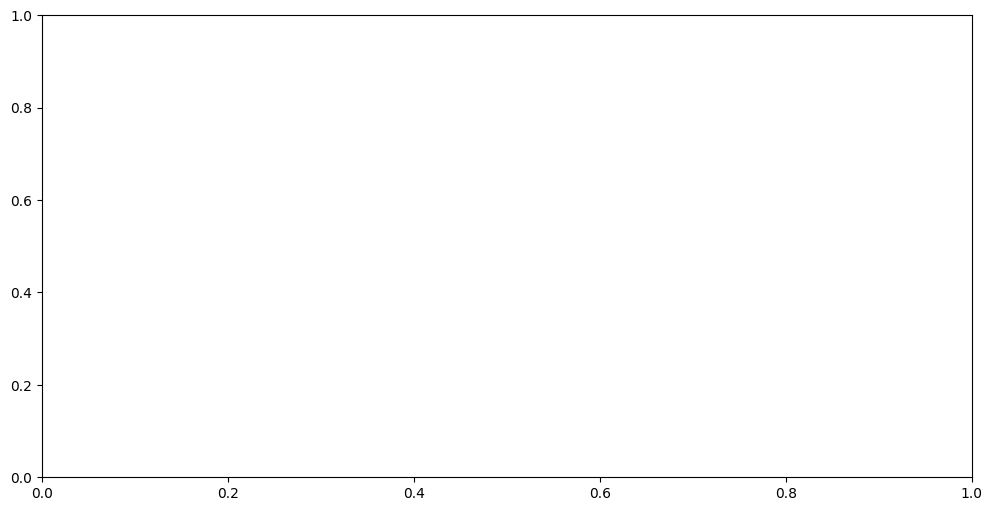

In [44]:
# Partial dependence plots
features = X.columns
fig, ax = plt.subplots(figsize=(12, 6))
plot_partial_dependence(gbdt_model, X_train, features=features, ax=ax)
plt.suptitle('Partial Dependence Plots for Non-Spatial Features')
plt.subplots_adjust(top=0.9)

In [64]:
# Step 5: Report
# Print model performance results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: Train R2 = {metrics['Train R2']:.4f}, Test R2 = {metrics['Test R2']:.4f}")

Model Performance:
Decision Tree: Train R2 = 0.0329, Test R2 = -0.0955
Random Forest: Train R2 = 0.8431, Test R2 = -0.0396
Gradient Boosting: Train R2 = 0.2420, Test R2 = 0.0063
Support Vector Machine: Train R2 = 0.0090, Test R2 = -0.0036
K-Nearest Neighbors: Train R2 = 0.0092, Test R2 = 0.0019


In [ ]:
# Display feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Impurity-Based Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Show partial dependence plots
plt.show()

In [87]:
# Assuming your decision tree model is named 'dt' and is already fitted
# Exclude the 'filename' column for prediction
T = test_prop.drop('filename', axis=1)

# Make predictions
predictions = dt.predict(T)

# Add predictions to the DataFrame
test_prop['Predicted_Score'] = predictions
test_prop

,filename,unlabelled,ground,building,road,green,sky,pedestrian,building2,Predicted_Score
0,hongdae_image_0_heading_0.jpg,11.932373,14.276123,21.282959,1.782227,4.174805,18.365479,4.119873,24.066162,7.0
1,hongdae_image_0_heading_180.jpg,9.521484,22.033691,15.216064,0.067139,2.221680,14.251709,5.187988,31.500244,6.0
2,hongdae_image_0_heading_270.jpg,16.229248,1.391602,19.989014,4.809570,0.531006,6.542969,2.075195,48.431396,7.0
3,hongdae_image_0_heading_90.jpg,15.106201,6.311035,34.930420,0.219727,0.854492,0.000000,9.179688,33.398438,5.0
4,hongdae_image_10_heading_0.jpg,10.156250,16.217041,51.501465,0.170898,0.085449,3.002930,10.284424,8.581543,8.0
5,hongdae_image_10_heading_180.jpg,11.352539,19.964600,35.729980,0.848389,4.138184,0.000000,12.377930,15.588379,5.0
6,hongdae_image_10_heading_270.jpg,12.805176,3.692627,43.591309,0.213623,0.024414,2.349854,26.232910,11.090088,6.0
7,hongdae_image_10_heading_90.jpg,10.754395,18.371582,28.186035,1.647949,2.703857,3.265381,25.140381,9.930420,4.0
